<a href="https://colab.research.google.com/github/TETRAWasTaken/MonoRepo/blob/main/DPEL_Ass_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

In [ ]:
import numpy as np
import pandas as pd

# Generating Synthetic Data

In [ ]:
np.random.seed(42)
n=1000

In [ ]:
data = pd.DataFrame({
    "Age": np.random.randint(18, 65, size=n),
    "Gender": np.random.choice(["Male", "Female"], size=n),
    "Income": np.random.randint(20000, 100000, size=n),
    "Purchase": np.random.choice(["Yes", "No"], size=n)
})

In [ ]:
data.head()

,Age,Gender,Income,Purchase
0,56,Male,49241,Yes
1,46,Female,64569,Yes
2,32,Female,31745,No
3,60,Female,46029,Yes
4,25,Male,33025,No


In [ ]:
data.to_csv("Synthetic Data", index = False)

#Creating Fake Names

In [ ]:
import uuid
from faker import Faker
import random

In [ ]:
num_users = 100

In [ ]:
features = [
    "id",
    "gender",
    "subscriber",
    "name",
    "rating"
]

df = pd.DataFrame(columns=features)
df

,id,gender,subscriber,name,rating


In [ ]:
df['id'] = [uuid.uuid4().node for _ in range(num_users)]
print(df['id'].nunique() == num_users)

True


In [ ]:
genders = ['Male','Female','Na']
df['gender'] = random.choices(genders, weights=(45,45,10), k=num_users)

In [ ]:
choice = [True, False]
df['subscriber'] = random.choices(choice, weights=(70,30), k=num_users)

In [ ]:
faker = Faker(locale='FR_FR')
def name_gen(gender):
  if gender == 'Male':
    return faker.name_male()
  elif gender == 'Female':
    return faker.name_female()
  else:
    return faker.name()

df['name'] = [name_gen(gender) for gender in df['gender']]

In [ ]:
ratings = [1,2,3,4,5]
df['rating'] = random.choices(ratings, k=num_users, weights=(5,10,10,10,5))

In [ ]:
df

,id,gender,subscriber,name,rating
0,207631860975856,Male,False,Thibault Gérard,2
1,185681515160701,Female,True,Bernadette Da Costa,2
2,268934578568321,Male,True,Guy Grenier,3
3,57679765832007,Na,True,Maggie-Brigitte Duhamel,2
4,258945708038419,Female,True,Sabine Vidal de la Bourdon,2
...,...,...,...,...,...
95,142206028174169,Female,False,Claire Thibault,4
96,181946666011239,Male,False,Thibaut Guillou,2
97,23892227391908,Male,True,Michel Gonzalez,2
98,266214626654049,Male,True,Alfred Masse,4


#Creating Images

In [ ]:
from PIL import Image, ImageDraw
import os

In [ ]:
os.mkdir("/content/synthetic_images")

In [ ]:
for i in range(10):
  img = Image.new("RGB", (100,100), color=(70,56,87))
  draw = ImageDraw.Draw(img)
  draw.rectangle([20, 20, 80, 80], outline="red", fill='white')
  img.save(f"/content/synthetic_images/image_{i}.png")

#Creating Sentences

In [ ]:
names = ['Alice','Bob','Charlie','Daisy']
actions = ['bought','sold','recommended','reviewed']
items = ['laptop','phone','book','shirt']

sentences = [
    f"{random.choice(names)} {random.choice(actions)} a {random.choice(items)}."
    for _ in range(10)
]
for _ in sentences:
  print(_)

Bob recommended a shirt.
Charlie sold a book.
Charlie sold a laptop.
Alice bought a shirt.
Alice recommended a shirt.
Alice reviewed a book.
Alice reviewed a shirt.
Charlie recommended a book.
Bob sold a laptop.
Bob reviewed a book.


#Creating Graphical Data

<Axes: title={'center': 'Simulated Sensor Data'}, xlabel='Time'>

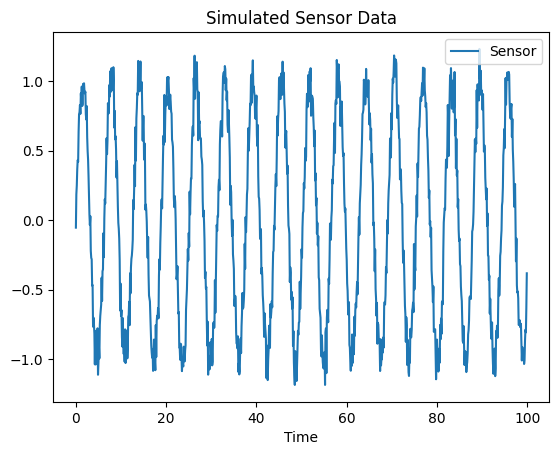

In [ ]:
t = np.arange(0, 100, 0.1)
sensor = np.sin(t) + np.random.normal(0, 0.1, len(t))

df = pd.DataFrame({"Time":t, "Sensor":sensor})
df.plot(x="Time", y="Sensor", kind="line", title="Simulated Sensor Data")